In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AI Quest/Assignment-08/heart failure.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
import seaborn as sns

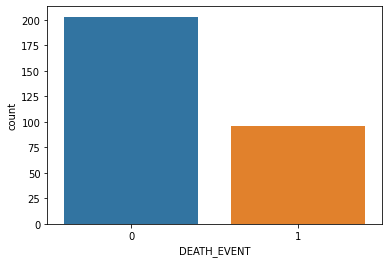

In [6]:
sns.countplot(x = "DEATH_EVENT", data = df)

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
from matplotlib import pyplot as plt

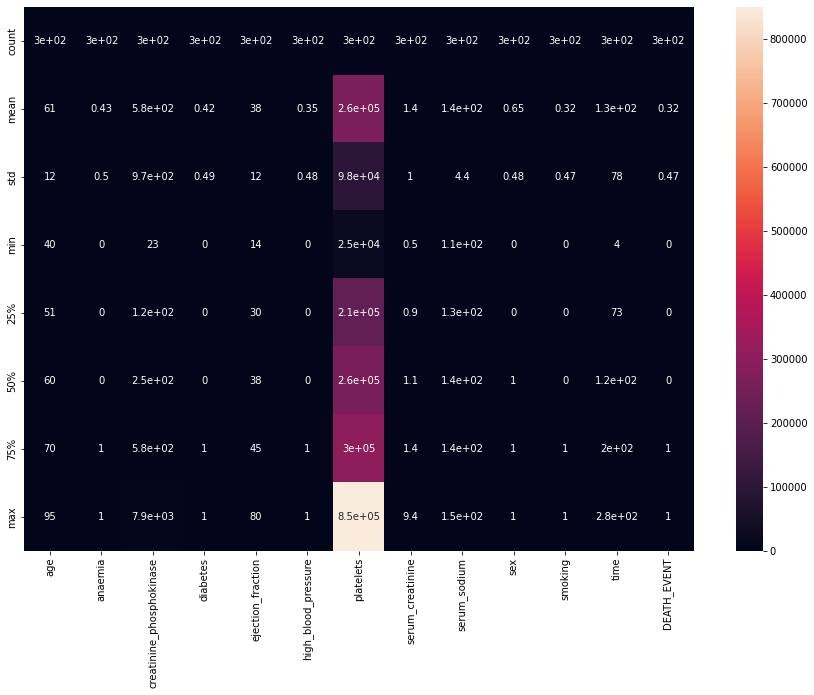

In [9]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.describe(), annot = True)

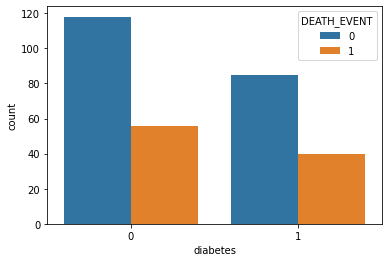

In [10]:
sns.countplot(x = "diabetes", hue = "DEATH_EVENT", data = df)

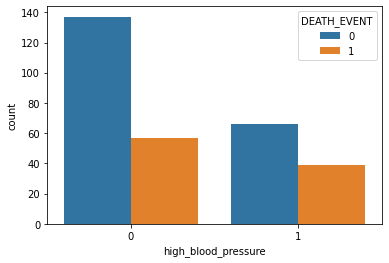

In [11]:
sns.countplot(x = "high_blood_pressure", hue = "DEATH_EVENT", data = df)

In [12]:
x = df.drop("DEATH_EVENT", axis = 1)

In [13]:
y = df["DEATH_EVENT"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [16]:
xtrain.shape

(209, 12)

In [17]:
ytrain.shape

(209,)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [21]:
pred = dtc.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [22]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [24]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.71      0.65      0.68        26

    accuracy                           0.82        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90



In [25]:
cm = confusion_matrix(ytest, pred)
cm

array([[57,  7],
       [ 9, 17]])

In [26]:
dtc.score(xtest, ytest)

0.8222222222222222

In [27]:
accuracy_score(ytest, pred)

0.8222222222222222

In [28]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [29]:
tp

57

In [30]:
fn

7

In [31]:
fp

9

In [32]:
tn

17

In [33]:
(tp+tn)/(tp+fn+fp+tn)

0.8222222222222222

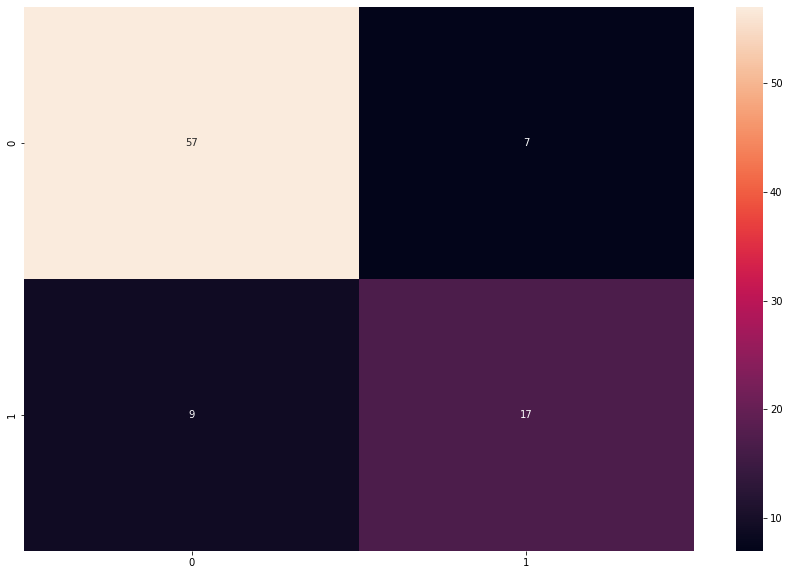

In [34]:
plt.figure(figsize = (15, 10))
sns.heatmap(cm, annot = True)

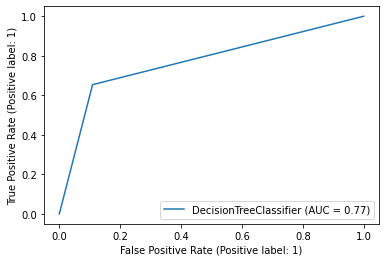

In [35]:
plot_roc_curve(dtc,xtest, ytest)

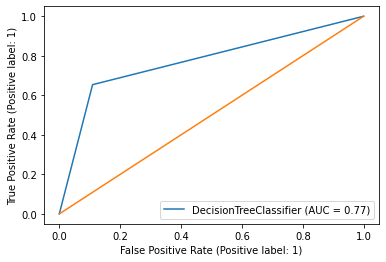

In [36]:
plot_roc_curve(dtc, xtest, ytest)
plt.plot([0, 1], [0, 1])

#**Precision or Positive Predictive Value (PPV)**

In [37]:
ppv = tp/(tp+fp)
ppv

0.8636363636363636

#**Negative Predictive Value (NPV)**

In [38]:
npv = tn/(fn+tn)
npv

0.7083333333333334

#**Sensitivity/Recall/Hit rate/True Positive Rate (TPR)**

In [39]:
tpr = tp/(tp+fn)
tpr

0.890625

#**1-specificity or False Positive Rate (FPR)**

In [40]:
fpr = fp/(fp+tn)
fpr

0.34615384615384615

#**F1 measure**

In [41]:
f1_measure = (ppv+tpr)/2
f1_measure

0.8771306818181819

#**Harmonic Mean/F1-score**

In [42]:
f1_score = (2*ppv*tpr)/(ppv+tpr)
f1_score

0.8769230769230768

#**Specifity/Selectivity/True Negative Rate (TNR)**

In [43]:
tnr = tn/(tn+fp)
tnr

0.6538461538461539

#**Threat Score (TS) or Critical Success Index (CSI)**

In [44]:
csi = tp/(tp+fn+fp)
csi

0.7808219178082192

#**False Discovery Rate (FDR)**

In [45]:
fdr = fp/(tp+fp)
fdr

0.13636363636363635

#**Accuracy**

In [46]:
acc = (tp+tn)/(tp+fn+fp+tn)
acc

0.8222222222222222

#**Balanced Accuracy**

In [47]:
ba = (tpr+tnr)/2
ba

0.7722355769230769

#**Informedness or Bookmaker Informedness (BI)**

In [48]:
bi = tpr+tnr-1
bi

0.5444711538461537

#**Markedness (MK) or Δp**

In [49]:
mk = ppv+npv-1
mk

0.571969696969697

#**Matthews Correlation Coefficient (MCC)**

In [50]:
import math

In [51]:
mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
mcc

0.5580510737146968

#**Fowlkes-Mallowes Index (FMI)**

In [52]:
fmi = math.sqrt((tp/(tp+fp))*(tp/(tp+fn)))
fmi

0.8770268732277458

In [53]:
fm = math.sqrt(ppv*tpr)
fm

0.8770268732277458